In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn import neighbors as nn
from sklearn import preprocessing


In [16]:
drifts = ["minority-share",
     "appearing-clusters"
    "splitting-clusters",
    "appearing-minority",
     "borderline",
     "clusters-movement",
    "disappearing-minority",
     "jitter"
     "shapeshift",
     "splitting-clusters",
]

colors = ['tab:blue', 'tab:red', 'tab:blue']

def animate(i=0):
    
    ax.clear()
    plt.title(str(40000+3000*i))
    Y = Y_tot.loc[40000+3000*i:43000+3000*i]
    X = X_tot.loc[40000+3000*i:43000+3000*i,:]
    for cl in Y.unique():
        x = X[0][Y==cl]
        y = X[1][Y==cl]
        ax.scatter(x, y,label=cl,marker=marker[int(cl)], c = colors[int(cl)],alpha=0.3)
    return ax.plot()




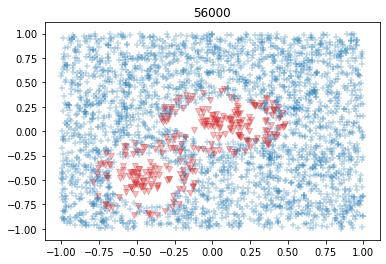

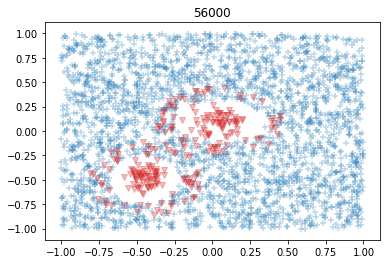

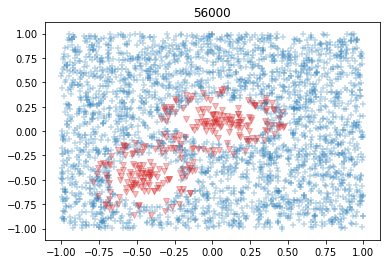

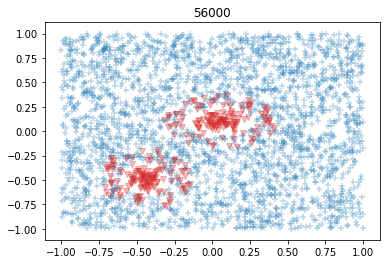

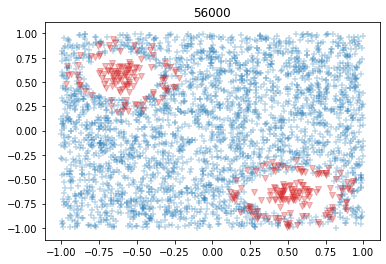

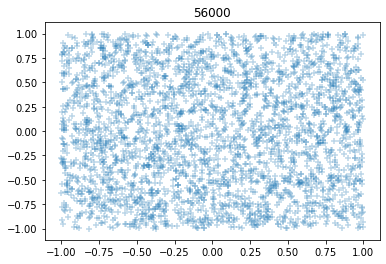

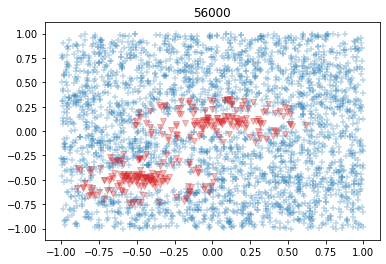

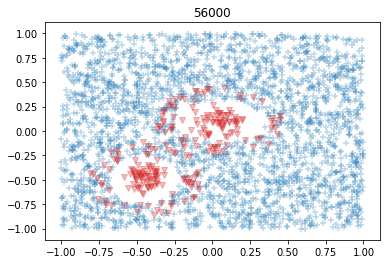

In [20]:
for d in drifts:
    
    df = pd.read_csv(f"/Users/08volt/Desktop/drift/{d}.csv", header= None)
    Y_tot = df[2]
    X_tot = df.drop([2,3],axis = 1)
    plt.style.use('seaborn-pastel')
    fig = plt.figure()
    ax = plt.axes(xlim=(-1, 1), ylim=(-1, 1))
    anim = FuncAnimation(fig, animate,frames=3, interval=1000, blit=True)
    anim.save(f'{d}.gif', writer='imagemagick')
    

appearing-clusters
[0. 1.]


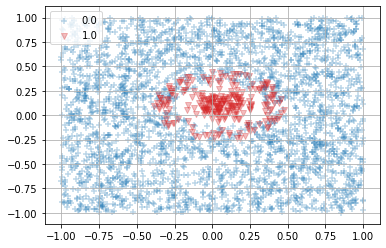

[0. 1.]


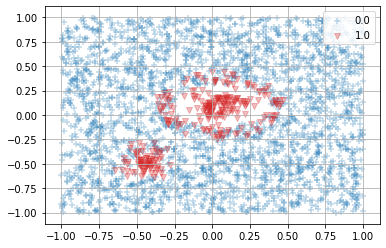

[0. 1.]


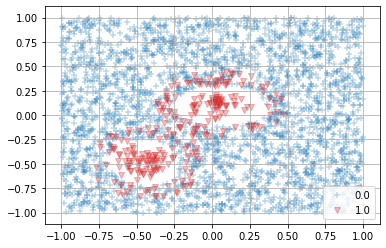

In [19]:
d = drifts[0]
d = "appearing-clusters"
print(d)
df = pd.read_csv(f"/Users/08volt/Desktop/drift/{d}.csv", header= None)
Y_tot = df[2]
X_tot = df.drop([2,3],axis = 1)
marker = ["+","v"]

splits = [(40000,43000),(48000,51000),(56000,59000)]
for s in splits:
    fig, ax = plt.subplots()
    colors = ['tab:blue', 'tab:red', 'tab:blue']
    Y = Y_tot.loc[s[0]:s[1]]
    
    X = X_tot.loc[s[0]:s[1],:]
    print(Y.unique())
    for cl in Y.unique():

        x = X[0][Y==cl]
        y = X[1][Y==cl]
        ax.scatter(x, y,label=cl,marker=marker[int(cl)], c = colors[int(cl)],alpha=0.3)

    ax.legend()
    ax.grid(True)

    plt.show()

In [ ]:
Knn = nn.KNeighborsClassifier(algorithm="brute", n_jobs=-1)
Knn.fit(X,Y)
majorityClass = np.bincount(Y).argmax()
category = ["safe","borderline","rare","outlier"]
nearest = Knn.kneighbors(n_neighbors= 5, return_distance= False)

In [ ]:
results = pd.DataFrame(columns = ["i","class", "category"])
for i,n in enumerate(nearest):
    cl = Y[i]
    same = 0
    other = 0
    category = "safe"
    for nnn in n:
        if Y[nnn] == cl:
            same += 1
        else:
            other += 1
    if same == 1:
        category = "outlier"
    elif same <= 2:
        category = "rare"
    elif same <= 4:
        category = "borderline"

    df2 = pd.DataFrame([[i,cl,category]],columns = ["i","class", "category"])

    results = results.append(df2)

In [ ]:
zeros = results[results["class"]==majorityClass].count()[0]
ones = results[results["class"]!= majorityClass].count()[0]
categories_counts = results.groupby(["class","category"]).count()
categories_counts = categories_counts.reset_index()
categories_counts

In [ ]:
def map_p(i):
    divider = zeros
    if categories_counts["class"][i] != majorityClass:
        divider = ones
    return int(categories_counts["i"][i] * 10000/divider) / 100



categories_counts["p"] = pd.Series(categories_counts.index).apply(map_p)
categories_counts